## What is Gradient Boosting?

- Gradient Boosting is a supervised machine learning algorithm used for both classification and regression problems. It's an ensemble method that builds models sequentially, with each new model trying to correct the errors made by the previous ones.
- It belongs to the family of boosting algorithms, where models are combined to create a strong predictor from many weak learners (typically decision trees).

### How Does Gradient Boosting Work?

Let’s break it down step-by-step:

**Start with an initial model:**

- Usually a simple prediction, like the mean (for regression) or log-odds (for classification).

**Compute residuals/errors:**

- Calculate how far off the predictions are (the difference between predicted and actual values).

**Train a new model on these residuals:**

- This new model tries to predict the error made by the previous model.

**Update the prediction:**

- Add the new model's prediction (scaled by a learning rate) to the existing model’s prediction.

**Repeat:**

- Keep training new models on the residuals of the combined prediction so far.

**Final prediction:**

- The sum of the predictions from all the individual models. 

### Advantages of Gradient Boosting
**High Accuracy:** One of the most accurate methods in supervised learning.

- Works well with both numerical and categorical features.

- Robust to outliers (with appropriate loss functions like Huber).

**Flexibility:** Can be used with different loss functions.

**Feature importance:** Provides insight into which features are important.

# Mental Health Risk Prediction in Students

In [24]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# 1. Simulate dataset
np.random.seed(42)
n_samples = 500

In [26]:
# Features
sleep_hours = np.random.normal(6.5, 1.5, n_samples)            # avg sleep in hours
screen_time = np.random.normal(6, 2, n_samples)                # avg daily screen time
attendance = np.random.uniform(50, 100, n_samples)             # attendance %
social_score = np.random.uniform(1, 10, n_samples)             # social engagement
stress = np.random.normal(6, 2, n_samples)                     # stress level (1-10)
gpa = np.random.normal(2.8, 0.6, n_samples)                    # GPA

In [27]:
# Target variable: Mental health risk (1 = At Risk, 0 = Not at Risk)
risk = ((sleep_hours < 6) & (stress > 6) & (gpa < 2.5)).astype(int)

In [28]:
# Combine into DataFrame
df = pd.DataFrame({
    "SleepHours": sleep_hours,
    "ScreenTime": screen_time,
    "Attendance": attendance,
    "SocialScore": social_score,
    "StressLevel": stress,
    "GPA": gpa,
    "AtRisk": risk
})

In [29]:
# 2. Feature matrix and target
X = df.drop("AtRisk", axis=1)
y = df["AtRisk"]

In [30]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# 4. Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [32]:
# 5. Predictions
y_pred = model.predict(X_test)

In [33]:
# 6. Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [34]:
print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1 Score:  {f1:.2f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:  1.00
Precision: 1.00
Recall:    1.00
F1 Score:  1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00         3

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix:
 [[97  0]
 [ 0  3]]


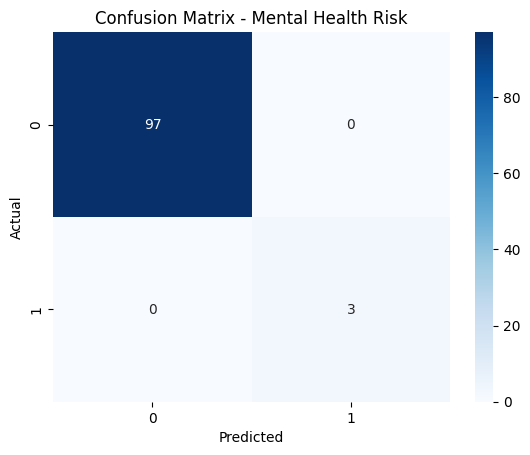

In [35]:
# 7. Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Mental Health Risk")
plt.show()